<h1 align="center"> Heat Maps using Matplotlib and Seaborn </h1>

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
helix = pd.read_csv('Data/helix_parameters.csv')
helix.head() # just seeing that data was imported properly by outputing first 5 cells

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [3]:
# checking what the columns are
helix.columns

Index([u'job_n', u'Energy', u'n_helices', u'r0_A', u'r0_B', u'r0_C', u'omega0',
       u'delta_omega0_A', u'delta_omega0_B', u'delta_omega0_C', u'z0_offset_A',
       u'z0_offset_B', u'z0_offset_C', u'helix1 phase', u'helix 2 phase',
       u'helix3 phase', u'invert_A', u'invert_B', u'invert_C', u'z1_offset_A',
       u'z1_offset_B', u'z1_offset_C', u'delta_t_A', u'delta_t_B',
       u'delta_t_C', u'omega1', u'z1'],
      dtype='object')

<h3 align='Left'>Selecting Columns (by different methods)</h3>

In [4]:
# selecting a couple columns
couple_columns = helix[['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']]
couple_columns.head()

,Energy,helix3 phase,helix 2 phase,helix1 phase
0,-387.167,0,0,0
1,-402.606,0,0,0
2,-395.944,0,0,0
3,-389.788,0,0,0
4,-388.016,0,0,0


In [5]:
# selecting same columns a different way
helix.ix[:,['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']].head()

,Energy,helix3 phase,helix 2 phase,helix1 phase
0,-387.167,0,0,0
1,-402.606,0,0,0
2,-395.944,0,0,0
3,-389.788,0,0,0
4,-388.016,0,0,0


<h3 align='Left'> Scatter Matrix (Not too useful in this case)</h3>

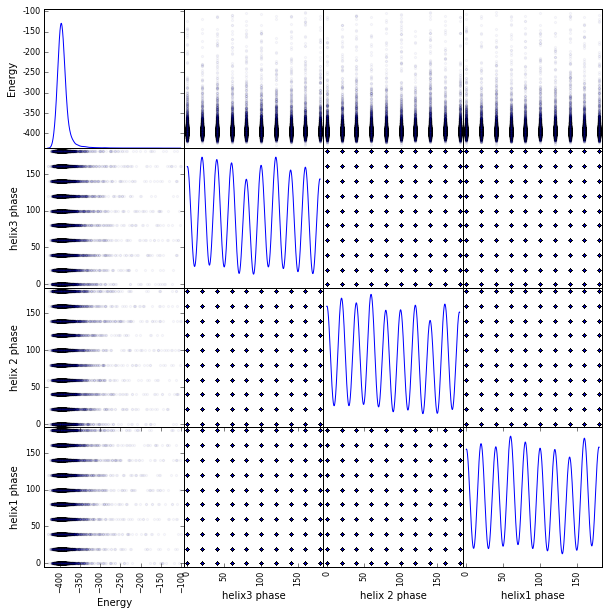

In [6]:
# you can also have hist on the diagonal
from pandas.tools.plotting import scatter_matrix
scatter_matrix(couple_columns,alpha=0.03, figsize=(10, 10), diagonal='kde');

A heat map may be more useful to see how the columns are related to eachother. 

<h3 align='Left'>Heat Map</h3>

In [7]:
#couple_columns[['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']]
data = couple_columns[['helix1 phase', 'helix 2 phase', 'Energy']]
data.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-387.167
1,0,0,-402.606
2,0,0,-395.944
3,0,0,-389.788
4,0,0,-388.016


In [8]:
# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
phase_1_2 = data.groupby(['helix1 phase', 'helix 2 phase']).mean()
phase_1_2.head(20)

Energy
helix1 phase helix 2 phase            
0            0             -392.419841
             20            -389.622691
             40            -390.318620
             60            -392.198537
             80            -393.661624
             100           -392.226253
             120           -390.955112
             140           -394.319969
             160           -392.594862
             180           -389.254009
20           0             -390.013375
             20            -393.121438
             40            -390.435441
             60            -390.489424
             80            -395.112815
             100           -389.307695
             120           -393.365839
             140           -392.171938
             160           -389.534864
             180           -391.171958

In [9]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-392.419841
1,0,20,-389.622691
2,0,40,-390.318620
3,0,60,-392.198537
4,0,80,-393.661624


In [10]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

color = pd.DataFrame(data = (phase_1_2['Energy']- phase_1_2['Energy'].mean()).apply(lambda x: sigmoid(x * -1) * 255))
color.head()

,Energy
0,187.573177
1,36.985847
2,64.735991
3,176.042801
4,231.011831


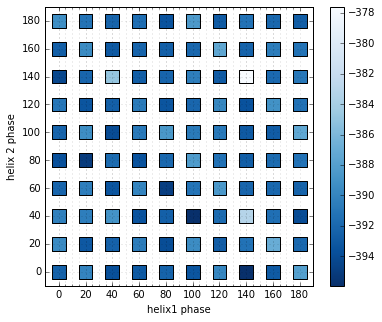

In [29]:
major_ticks = np.arange(0, 200, 20)                                              
minor_ticks = np.arange(0, 180, 5)  

fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 
s = ax.scatter('helix1 phase', 'helix 2 phase', c = 'Energy',data = phase_1_2, cmap = 'Blues_r', marker = 's',s = 190)
ax.axis([phase_1_2['helix1 phase'].min()-10, phase_1_2['helix1 phase'].max()+10, phase_1_2['helix 2 phase'].min()-10, phase_1_2['helix 2 phase'].max()+10])
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                                                                                                                      
ax.grid(which='both', alpha = 0.3)                                                                                                           
ax.grid(which='major', alpha=0.3) 
ax.set_xlabel('helix1 phase', fontsize=10);
ax.set_ylabel('helix 2 phase', fontsize=10);

cbar = plt.colorbar(mappable = s,ax = ax)

plt.show()